# Hedging with Black-Scholes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hestonpy.models.blackScholes import BlackScholes

import pandas as pd
dates = pd.date_range(start="2025-01-01", end="2025-07-01", freq="D")

nbr_simulations = 1000
nbr_hedges = len(dates)-1

# Replication

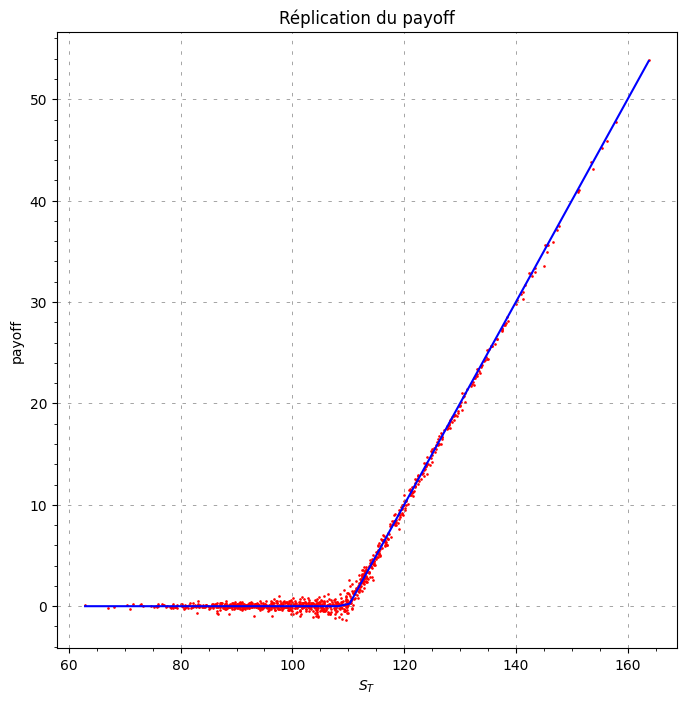

In [3]:
real_vol = 0.15
hedging_vol = 0.15

bs = BlackScholes(
    spot=100, r=0.01, mu=0.05, volatility=real_vol)
strike = 110

res = bs.delta_hedging(
    flag_option="call",
    time_to_maturity=1,
    strike=strike,
    hedging_volatility=hedging_vol,
    pricing_volatility=hedging_vol,
    nbr_simulations=nbr_simulations,
    nbr_hedges=nbr_hedges,
)

portfolio = res[0]
S = res[1]

ST = S[:, -1]
VT = portfolio[:, -1]

plt.figure(figsize=(8, 8))
plt.title("Réplication du payoff")
plt.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
plt.minorticks_on()
plt.xlabel(r"$S_T$")
plt.ylabel("payoff")
plt.scatter(ST, VT, s=0.8, color="red")
x = np.linspace(min(ST), max(ST))
payoff = np.maximum(0, x - strike)
plt.plot(x, payoff, color="blue")
plt.show()

4.472950451881076


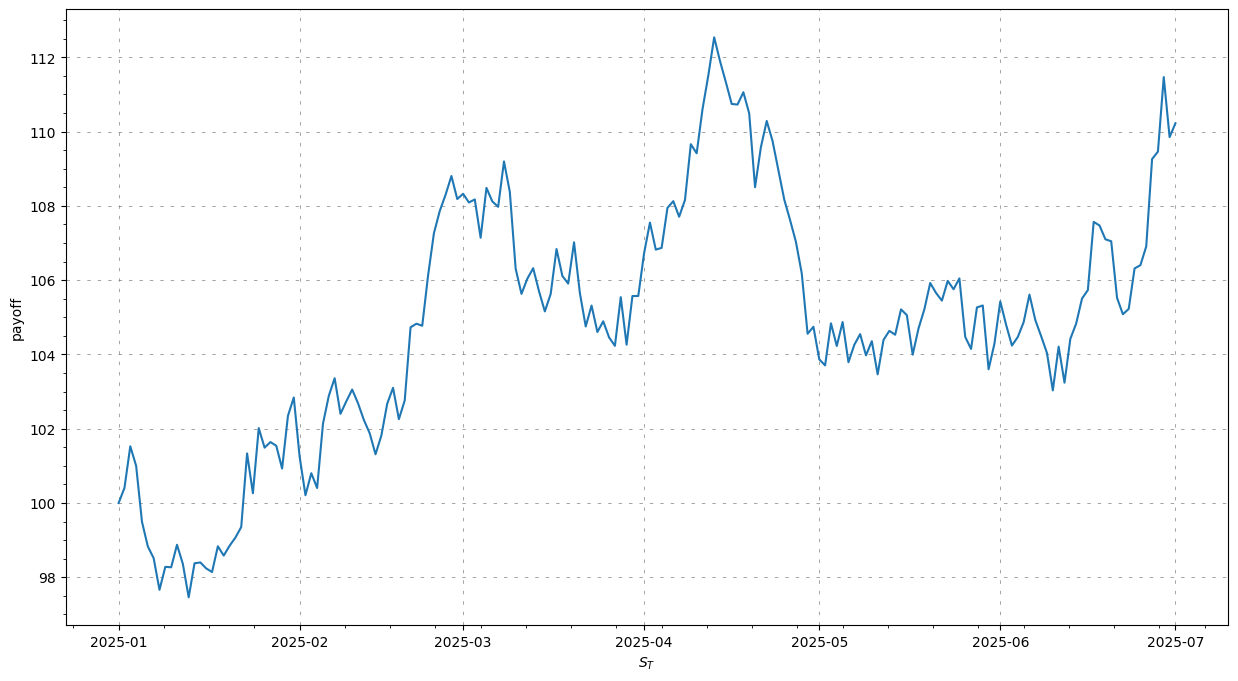

In [5]:
price = bs.call_price(strike=bs.spot, time_to_maturity=0.5)
print(price)

plt.figure(figsize=(15,8))
S = bs.simulate(time_to_maturity=0.5, nbr_points=nbr_hedges)

plt.plot(dates,S[0])

plt.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
plt.minorticks_on()
plt.xlabel(r"$S_T$")
plt.ylabel("payoff")
plt.show()

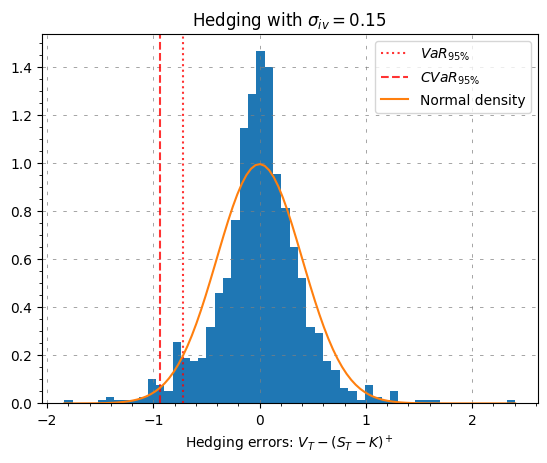

In [6]:
from scipy.stats import norm

cash_flows = np.maximum(0, ST - strike)
hedging_errors = VT - cash_flows

hedging_errors = np.sort(hedging_errors)
VaR95_index = int(0.05 * len(hedging_errors))
VaR95 = hedging_errors[VaR95_index]
CVaR95 = np.mean(hedging_errors[:VaR95_index])

plt.figure()

plt.title("Hedging with " + r"$\sigma_{iv} = $" + str(hedging_vol))
plt.hist(hedging_errors, bins="fd", density=True)

plt.axvline(VaR95, color='red', label=r'$VaR_{95\%}$', linestyle="dotted",alpha=0.8)
plt.axvline(CVaR95, color='red', label=r'$CVaR_{95\%}$', linestyle="--", alpha=0.8)

x = np.linspace(start=min(hedging_errors), stop=max(hedging_errors), num=100)
plt.plot(
    x,
    norm.pdf(x, loc=np.mean(hedging_errors), scale=np.std(hedging_errors)),
    label="Normal density",
)
plt.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
plt.minorticks_on()
plt.xlabel(r"Hedging errors: $V_T - (S_T - K)^+$")
plt.legend()
plt.show()

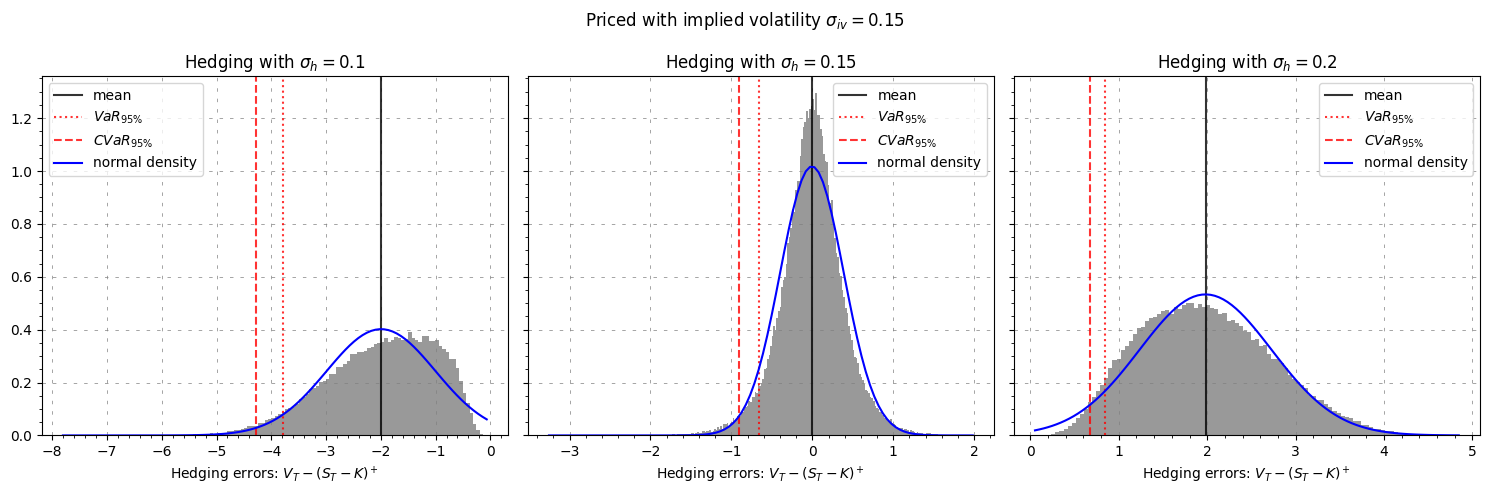

In [9]:
implied_volatility = 0.15
hedging_vols = [0.10, 0.15, 0.20]

bs = BlackScholes(spot=100, r=0.00, mu=0.00, volatility=implied_volatility)
strike = 100
nbr_simulations = 100000

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, vol in enumerate(hedging_vols):
    res = bs.delta_hedging(
        flag_option="call",
        time_to_maturity=1,
        strike=strike,
        hedging_volatility=vol,
        nbr_simulations=nbr_simulations,
        nbr_hedges=nbr_hedges,
    )

    portfolio = res[0]
    S = res[1]

    ST = S[:, -1]
    VT = portfolio[:, -1]

    cash_flows = np.maximum(0, ST - strike)
    hedging_errors = VT - cash_flows

    hedging_errors = np.sort(hedging_errors)
    VaR95_index = int(0.05 * len(hedging_errors))
    VaR95 = hedging_errors[VaR95_index]
    CVaR95 = np.mean(hedging_errors[:VaR95_index])

    axes[i].set_title("Hedging with " + r"$\sigma_{h} = $" + str(vol))
    axes[i].hist(hedging_errors, bins="fd", density=True, color="gray", alpha=0.8)
    axes[i].axvline(np.mean(hedging_errors), color="black", label="mean", alpha=0.8)
    axes[i].axvline(VaR95, color='red', label=r'$VaR_{95\%}$', linestyle="dotted",alpha=0.8)
    axes[i].axvline(CVaR95, color='red', label=r'$CVaR_{95\%}$', linestyle="--", alpha=0.8)

    x = np.linspace(start=min(hedging_errors), stop=max(hedging_errors), num=100)
    axes[i].plot(
        x,
        norm.pdf(x, loc=np.mean(hedging_errors), scale=np.std(hedging_errors)),
        label="normal density",
        color="blue",
    )
    axes[i].grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
    axes[i].minorticks_on()
    axes[i].set_xlabel(r"Hedging errors: $V_T - (S_T - K)^+$")
    axes[i].legend()

plt.suptitle(
    r"Priced with implied volatility $\sigma_{iv} =$" + str(implied_volatility)
)
plt.tight_layout()
plt.show()

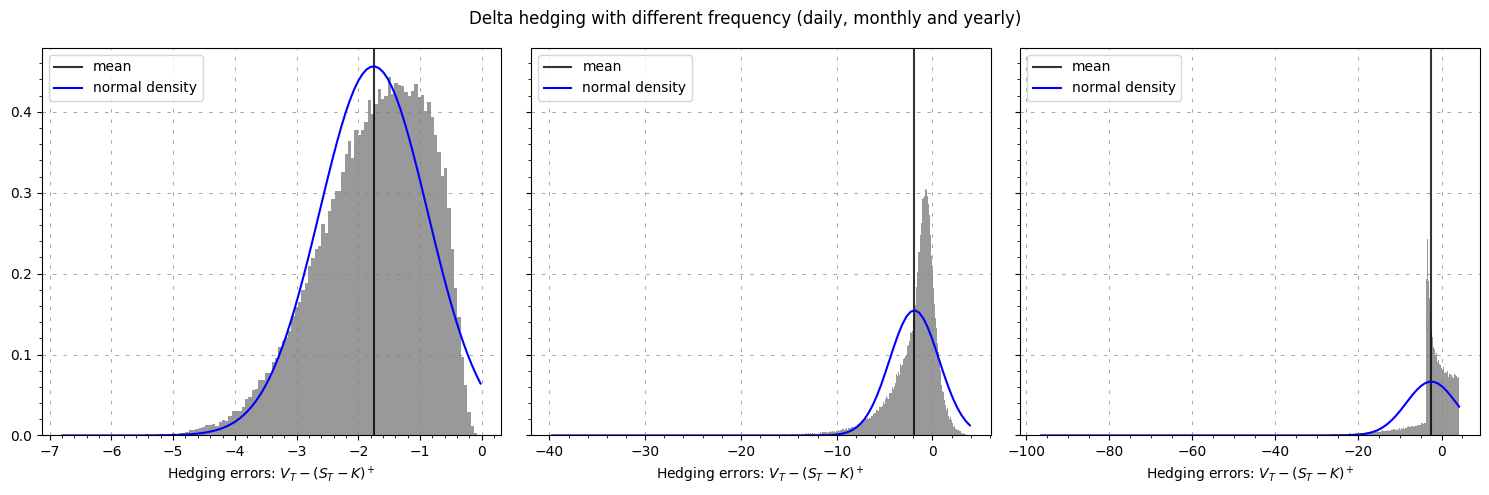

In [12]:
implied_volatility = 0.15
bs = BlackScholes(spot=100, r=0.00, mu=0.00, volatility=implied_volatility)
strike = 100

daily_dates = pd.date_range(start="2025-01-01", end="2025-07-01", freq="D")
monthly_dates = pd.date_range(start="2025-01-01", end="2025-07-01", freq="ME")
yearly_dates = [daily_dates[0]]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, dates in enumerate([daily_dates, monthly_dates, yearly_dates]):
    res = bs.delta_hedging(
        flag_option="call",
        time_to_maturity=0.5,
        strike=strike,
        hedging_volatility=implied_volatility,
        nbr_simulations=nbr_simulations,
        nbr_hedges=len(dates),
    )

    portfolio = res[0]
    S = res[1]

    ST = S[:, -1]
    VT = portfolio[:, -1]

    cash_flows = np.maximum(0, ST - strike)
    hedging_errors = VT - cash_flows

    hedging_errors = np.sort(hedging_errors)

    axes[i].hist(hedging_errors, bins="fd", density=True, color="gray", alpha=0.8)
    axes[i].axvline(np.mean(hedging_errors), color="black", label="mean", alpha=0.8)

    x = np.linspace(start=min(hedging_errors), stop=max(hedging_errors), num=100)
    axes[i].plot(
        x,
        norm.pdf(x, loc=np.mean(hedging_errors), scale=np.std(hedging_errors)),
        label="normal density",
        color="blue",
    )
    axes[i].grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
    axes[i].minorticks_on()
    axes[i].set_xlabel(r"Hedging errors: $V_T - (S_T - K)^+$")
    axes[i].legend()

plt.suptitle("Delta hedging with different frequency (daily, monthly and yearly)")
plt.tight_layout()
plt.show()

# Hedging with a misspecified model

Since the market does not have perfect knowledge about the future actual and implied volatilities can and will be different.

Imagine that we have a forecast for volatility over the remaining life of an option, this volatility is forecast to be constant, and further assume that our forecast turns out to be correct. We shall buy an underpriced option and delta hedge to expiry.But which delta do you choose? Delta based on actual or implied volatility?

- **Scenario**: Implied volatility for an option is 20%, but we believe that actual volatility is 30%. 
- **Question**: How can we make money if our forecast is correct? 
- **Answer**: Buy the option and delta hedge. 
But which delta do we use?

In [16]:
np.random.seed(42)

# Model parameters
S0 = 100
mu = 0.00
r = 0.00
time_to_maturity = 1
stirke = 100

real_volatility = 0.30
implied_volatility = 0.20
model = BlackScholes(spot=100, r=r, mu=mu, volatility=real_volatility)

portfolio_iv, _ = model.volatility_arbitrage(
    pricing_volatility=implied_volatility,
    hedging_volatility=implied_volatility,
    strike=strike,
    time_to_maturity=time_to_maturity,
    flag_option="call",
    nbr_hedges=nbr_hedges,
    nbr_simulations=nbr_simulations,
)

portfolio_real, _ = model.volatility_arbitrage(
    pricing_volatility=implied_volatility,
    hedging_volatility=real_volatility,
    strike=strike,
    time_to_maturity=time_to_maturity,
    flag_option="call",
    nbr_hedges=nbr_hedges,
    nbr_simulations=nbr_simulations,
)

TypeError: BlackScholes.simulate() got an unexpected keyword argument 'n'

In [ ]:
number_plots = 15  # must be < nPaths

# Plotting results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

time_points = np.linspace(0, T, nbr_points + 1)

# Hedging with actual volatility
ax1.set_title(
    "Hedging with implied volatility " + r"$\sigma_{iv} =$ " + str(implied_volatility)
)
for i in range(number_plots):
    ax1.plot(
        time_points, portfolio_iv[i, :], color="blue", linewidth=0.8
    )  # Add transparency for better readability
ax1.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
ax1.minorticks_on()
ax1.set_xlabel("time")
ax1.set_ylabel("Cumulative PnL")

# Hedging with implied volatility
ax2.set_title(
    "Hedging with actual volatility " + r"$\sigma_{real} =$ " + str(real_volatility)
)
for i in range(number_plots):
    ax2.plot(
        time_points, portfolio_real[i, :], color="black", linewidth=0.8
    )  # Add transparency for better readability
ax2.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
ax2.minorticks_on()
ax2.set_xlabel("time")

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)


ax1.set_title(
    "Hedging with implied volatility " + r"$\sigma_{iv} =$ " + str(implied_volatility)
)

final_pnl_iv = portfolio_iv[:, -1]
final_pnl_iv = np.sort(final_pnl_iv)
VaR95_index = int(0.05 * len(final_pnl_iv))
VaR95 = final_pnl_iv[VaR95_index]
CVaR95 = np.mean(final_pnl_iv[:VaR95_index])

ax1.axvline(np.mean(final_pnl_iv), color="black", label="mean", alpha=0.8)
ax1.axvline(VaR95, color='red', label=r'$VaR_{95\%}$', linestyle="dotted",alpha=0.8)
ax1.axvline(CVaR95, color='red', label=r'$CVaR_{95\%}$', linestyle="--", alpha=0.8)

ax1.hist(final_pnl_iv, bins="fd", density=True, color="gray", alpha=0.8)
ax1.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
ax1.minorticks_on()
ax1.set_xlabel("$PnL_T$")



ax2.set_title(
    "Hedging with actual volatility " + r"$\sigma_{real} =$ " + str(real_volatility)
)

final_pnl_actual = portfolio_real[:, -1]
final_pnl_actual = np.sort(final_pnl_actual)
VaR95_index = int(0.05 * len(final_pnl_actual))
VaR95 = final_pnl_actual[VaR95_index]
CVaR95 = np.mean(final_pnl_actual[:VaR95_index])

ax2.axvline(np.mean(final_pnl_actual), color="black", label="mean", alpha=0.8)
ax2.axvline(VaR95, color='red', label=r'$VaR_{95\%}$', linestyle="dotted",alpha=0.8)
ax2.axvline(CVaR95, color='red', label=r'$CVaR_{95\%}$', linestyle="--", alpha=0.8)

ax2.hist(final_pnl_actual, bins="fd", density=True, color="gray", alpha=0.8)
ax2.grid(linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5)
ax2.minorticks_on()
ax2.set_xlabel("$PnL_T$")

plt.tight_layout()
plt.show()

In [ ]:
# Statistics

# Hedging with implied volatility
final_pnl = portfolio_iv[:, -1]
mean_pnl = np.mean(final_pnl)
std_pnl = np.std(final_pnl)
pathwise_var = np.mean([np.sum(np.diff(portfolio_iv[i]) ** 2) for i in range(nPaths)])

print(f"Experiment 1 (blue) - Hedging with implied volatility:")
print(f"  Mean PnL(T): {mean_pnl:.2f}")
print(f"  Std Dev PnL(T): {std_pnl:.2f}")
print(f"  Pathwise Quadratic Variation: {pathwise_var:.2f}\n")

# Hedging with actual/forecasted volatility
final_pnl = portfolio_real[:, -1]
mean_pnl = np.mean(final_pnl)
std_pnl = np.std(final_pnl)
pathwise_var = np.mean([np.sum(np.diff(portfolio_real[i]) ** 2) for i in range(nPaths)])

print(f"Experiment 2 (black) - Hedging with actual/forecasted volatility:")
print(f"  Mean PnL(T): {mean_pnl:.2f}")
print(f"  Std Dev PnL(T): {std_pnl:.2f}")
print(f"  Pathwise Quadratic Variation: {pathwise_var:.2f}\n")